<a href="https://colab.research.google.com/github/haoyujfan/Stock-Prediction-LSTM/blob/master/StockLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description 
# This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM)
# to predict the closing stock price of a corporation using the past 60 day stock price

In [1]:
# install yahoo finance API
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 63 kB 831 kB/s 
     |████████████████████████████████| 6.4 MB 37.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
# Import the libraries 
import math 
import pandas_datareader as web
import yfinance as yf
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential 
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# Get the stock quote 
df = yf.download('AAPL', start='2014-01-01', end='2022-06-05')
# Show the data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.468655,234684800
2014-01-03,19.745001,19.775000,19.301071,19.320715,17.084940,392467600
2014-01-06,19.194643,19.528570,19.057142,19.426071,17.178104,412610800
2014-01-07,19.440001,19.498571,19.211430,19.287144,17.055250,317209200
2014-01-08,19.243214,19.484285,19.238930,19.409286,17.163261,258529600
...,...,...,...,...,...,...
2022-05-27,145.389999,149.679993,145.259995,149.639999,149.639999,90978500
2022-05-31,149.070007,150.660004,146.839996,148.839996,148.839996,103718400
2022-06-01,149.899994,151.740005,147.679993,148.710007,148.710007,74286600


In [4]:
# Get number of rows and columns in data set
df.shape

(2121, 6)

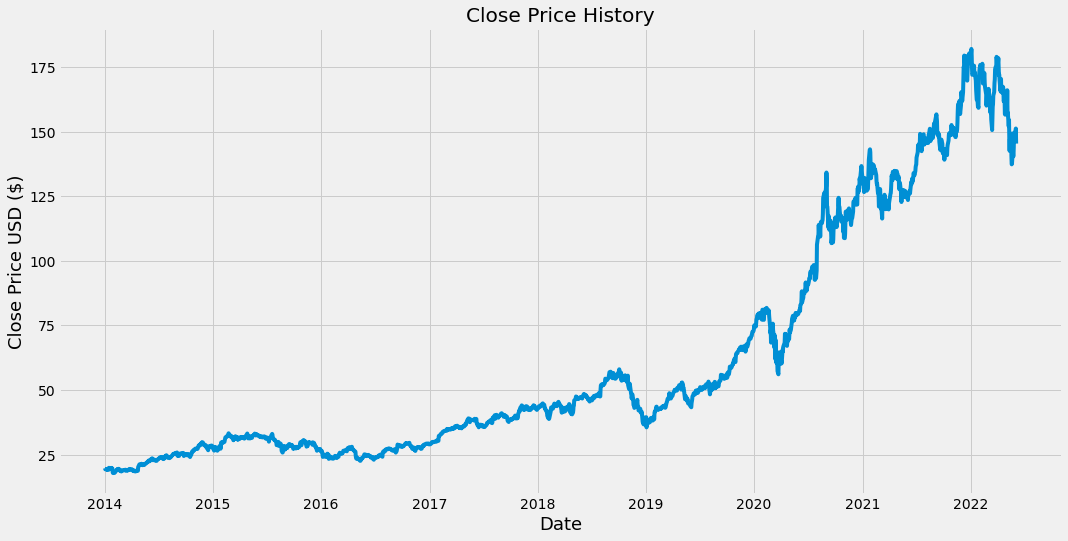

In [5]:
# Visualize the closing price history 
plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [6]:
# Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array 
dataset = data.values
# Get/Compute the number of row to train the LSTM model on 
training_data_len = math.ceil(len(dataset) * 0.8)

training_data_len


1697

In [7]:
# Scale the data (to 0 - 1 inclusive)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01160666],
       [0.00896335],
       [0.00960514],
       ...,
       [0.79715007],
       [0.81237905],
       [0.77686506]])

In [8]:
# Create the training data set 
# Create the scaled training data set 
train_data = scaled_data[0:training_data_len, :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)) :
  # 60 values labeled 0 through 59
  x_train.append(train_data[i-60:i, 0])
  # 61st value labeled 60
  y_train.append(train_data[i, 0])
  if i <= 61 :
    print(x_train)
    print(y_train)
    print()

[array([0.01160666, 0.00896335, 0.00960514, 0.00875885, 0.00950289,
       0.00799304, 0.00721419, 0.00782118, 0.01014033, 0.01252693,
       0.01185033, 0.0088959 , 0.01072339, 0.01125423, 0.01227021,
       0.01007071, 0.01103448, 0.00146199, 0.00021103, 0.        ,
       0.00017839, 0.00038072, 0.00196018, 0.00278691, 0.0027695 ,
       0.00432938, 0.00635484, 0.00787122, 0.0078625 , 0.00971392,
       0.00961818, 0.01005331, 0.00817797, 0.00682476, 0.00554117,
       0.00604155, 0.00484717, 0.00382248, 0.00606767, 0.00575656,
       0.00608725, 0.00684434, 0.00708801, 0.00673774, 0.0066703 ,
       0.00677473, 0.00789949, 0.00801262, 0.00671599, 0.00541935,
       0.00586534, 0.00687915, 0.0068487 , 0.00629175, 0.00719896,
       0.00857392, 0.00983575, 0.00870228, 0.00819754, 0.00806701])]
[0.00804091068532381]

[array([0.01160666, 0.00896335, 0.00960514, 0.00875885, 0.00950289,
       0.00799304, 0.00721419, 0.00782118, 0.01014033, 0.01252693,
       0.01185033, 0.0088959 , 0.01

In [9]:
# Convert the x_train and y_train to numpy arrays (for LSTM model training)
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
# Reshape the data (x_train) because LSTM expects 3D dataset but only 2D right now
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1637, 60, 1)

In [11]:
# Build the LSTM model 
model = Sequential()
# layer 1
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
# layer 2
model.add(LSTM(50, return_sequences=False))
# layer 3 (dense layer)
model.add(Dense(25))
# layer 4 (dense layer)
model.add(Dense(1))


In [12]:
# Compile the model 
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
# Train (fit) the model 
model.fit(x_train, y_train, batch_size=1, epochs=1)

1637/1637 [==============================] - 43s 24ms/step - loss: 6.1645e-04


In [14]:
# Create the testing data set 
# Create a new array containing scaled values from index 1542 to 2002 (scaled testing data set)
test_data = scaled_data[training_data_len - 60:, :]
# Create the data sets x_test and y_test 
x_test = [] # past 60 values 
y_test = dataset[training_data_len:, :] # values we want model to predict - actual test values
for i in range(60, len(test_data)) :
  x_test.append(test_data[i - 60:i, 0])

In [15]:
# Convert the data to a numpy array 
x_test = np.array(x_test)

In [16]:
# Reshape the data - our dataset 2D but LSTM expect 3D
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [17]:
# Get the model's predicted price values 
predictions = model.predict(x_test)
# Unscale the values - want predictions to contain same values as y_test
predictions = scaler.inverse_transform(predictions) 

In [20]:
# Get the root mean squared error (RMSE) - measure of predictions (lower values = better fit)
rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
rmse

10.495348730824645

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


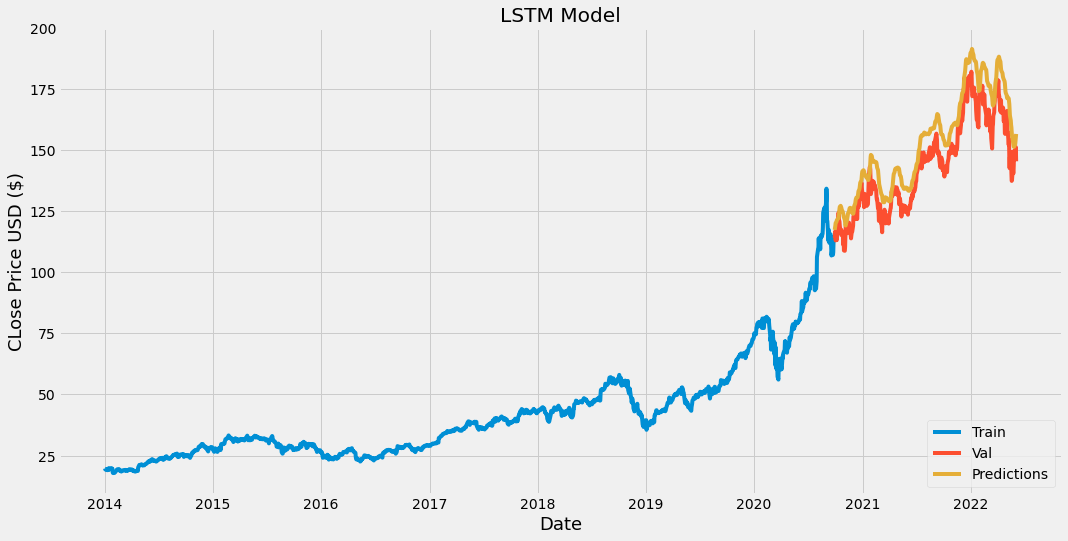

In [21]:
# Plot the data 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data 
plt.figure(figsize=(16, 8))
plt.title('LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('CLose Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [22]:
# Show the valid and predicted prices 
valid

,Close,Predictions
Date,,
2020-09-29,114.089996,117.319870
2020-09-30,115.809998,118.073601
2020-10-01,116.790001,119.039917
2020-10-02,113.019997,120.120422
2020-10-05,116.500000,120.651115
...,...,...
2022-05-27,149.639999,151.344040
2022-05-31,148.839996,152.415665
2022-06-01,148.710007,153.768616


In [23]:
# Predict closing price for next day 
# Get the quote
apple_quote = yf.download('AAPL', start='2014-01-01', end='2022-06-05')
# Create a new dataframe
new_df = apple_quote.filter(['Close'])
# Get the last 60 day closing price values and convert the dataframe to an arrray 
last_60_days = new_df[-60:].values
# Scale the data to be values between 0 and 1 (inclusive)
last_60_days_scaled = scaler.transform(last_60_days)
# Create an empty list 
X_test = []
# Append the past 60 days
X_test.append(last_60_days_scaled)
# Convert the X_test data set to a numpy array 
X_test = np.array(X_test)
# Reshape data from 2D to 3D
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price 
pred_price = model.predict(X_test)
# Undo the scaling 
pred_price = scaler.inverse_transform(pred_price)

print(pred_price) # predicted price for next day (2019-12-18)

[*********************100%***********************]  1 of 1 completed
[[157.17015]]


In [28]:
# Get the actual quote 
apple_quote2 = yf.download('AAPL', start='2022-06-04', end='2022-06-05')
print(apple_quote2['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2022-06-03    145.380005
Name: Close, dtype: float64
